In [39]:
# Import necessary libraries for text preprocessing
import pandas as pd

In [40]:
df = pd.read_excel("sinhala spam.xlsx")
df

,Lable,Message
0,Ham,ළඟදී නිවාඩු නැද්ද?
1,Ham,හෙට town එකට එන්න බැරි වෙයි.
2,Ham,හරි බං.. ඔක්කෝටම ද උත්තර ඕනි නැතිනං අමාරු ප්‍ර...
3,spam,"සො ෆා එකක් ගන්න, instant pay hurry->> tiny.on..."
4,Ham,සුවිශේෂී Asia Cup පැකේජය සමඟින්\n ශ්‍රී ලංකාව ...
...,...,...
60,spam,ONMAXDT වෙතින් රුපියල් 50000ක් දක්වා දිනුම් ලබ...
61,Ham,Freedom Plus 888 රීලෝඩ් එක සඳහා 50%ක දැවැන්ත ව...
62,spam,france යන්න ලියාපදිංචිය. https://shorturl.at/e...
63,Ham,"2023 ඡන්ද ලේඛනයේ ඔබේ නම තිබේදැයි, ග්‍රාම නිලධා..."


In [41]:
df.shape

(65, 2)

In [42]:
df=df.drop_duplicates()

In [43]:
df.shape

(65, 2)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Lable    65 non-null     object
 1   Message  65 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [45]:
df.describe()

,Lable,Message
count,65,65
unique,2,65
top,Ham,ළඟදී නිවාඩු නැද්ද?
freq,40,1


In [46]:
df['Lable'].value_counts()

Ham     40
spam    25
Name: Lable, dtype: int64

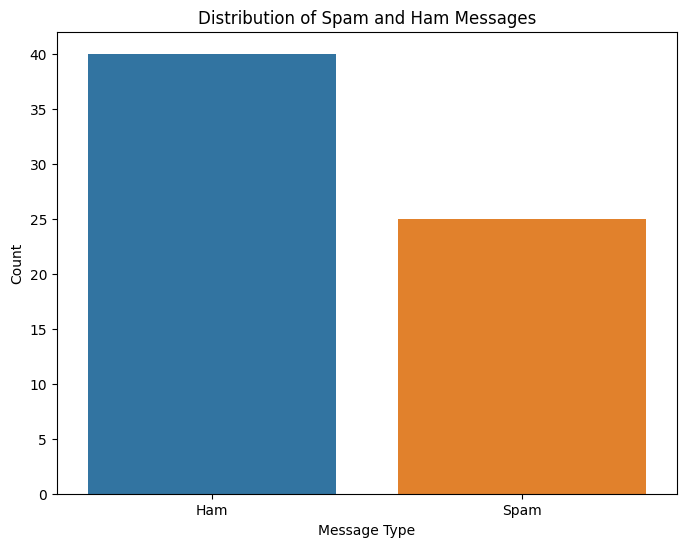

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Lable')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [48]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
import re

def preprocess_text(text):

    # Define a regular expression pattern to match Sinhala special characters
    sinhala_special_chars_pattern = re.compile(r'[^\u0D80-\u0DFF\s\w\d]+', re.UNICODE)
    # Use re.sub() to replace matched patterns with an empty string
    text = re.sub(sinhala_special_chars_pattern, '', text)
    # Tokenize the text
    words = text.split()

    sinhala_stopwords = ["සහ", "සමග", "සමඟ", "අහා", "ආහ්", "ආ", "ඕහෝ", "අනේ", "අඳෝ", "අපොයි", "අපෝ", "අයියෝ", "ආයි", "ඌයි", "චී", "චිහ්", "චික්", "හෝ‍", "දෝ", "දෝහෝ", "මෙන්", "සේ", "වැනි", "බඳු", "වන්", "අයුරු", "අයුරින්", "ලෙස", "වැඩි", "ශ්‍රී", "හා", "ය", "නිසා", "නිසාවෙන්", "බවට", "බව", "බවෙන්", "නම්", "වැඩි", "සිට", "දී", "මහා", "මහ", "පමණ", "පමණින්", "පමන", "වන", "විට", "විටින්", "මේ", "මෙලෙස", "මෙයින්", "ඇති", "ලෙස", "සිදු", "වශයෙන්", "යලි", "පුන", "ඉතින්", "සිට", "සිටන්", "පටන්", "තෙක්", "දක්වා", "ට", "ගේ", "එ", "ක", "ක්", "බවත්", "බවද", "මත", "ඇතුලු", "ඇතුළු", "මෙසේ", "වඩා", "වඩාත්ම", "නිති", "නිතිත්", "නිතොර", "නිතර", "ඉක්බිති", "දැනට", "එහෙන්", "මෙහෙන්", "එහේ", "මෙහේ", "ම", "තවත්", "තව ", "සහ", "දක්වා", "ට", "ගේ", "එ", "ක", "ක්", "බවත්", "බවද", "මත", "ඇතුලු", "ඇතුළු", "මෙසේ", "වඩා", "වඩාත්ම", "නිති", "නිතිත්", "නිතොර", "නිතර", "ඉක්බිති", "දැනට", "එහෙන්", "මෙහෙන්", "එහේ", "මෙහේ", "ම", "තවත්", "තව"]
    # Remove stopwords
    words = [word for word in words if word not in sinhala_stopwords]
    # Join the cleaned words back into a sentence
    cleaned_text = ' '.join(words)
    return cleaned_text

In [50]:
# Create a copy of the DataFrame and modify it
df_1 = df.copy()
# Create a copy of the 'message' column to avoid SettingWithCopyWarning
df_1['Message'] = df_1['Message'].apply(lambda x: preprocess_text(x))

In [51]:
df_1['Lable'] = df_1['Lable'].map({'Ham': 0, 'spam': 1})

In [52]:
# Split the data into features (X) and labels (y)
X = df_1['Message']
y = df_1['Lable']

In [53]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
y_train

13    0
34    1
25    0
3     1
17    0
40    0
8     0
6     0
63    0
4     0
48    1
36    0
19    0
55    0
58    0
56    0
50    0
31    1
44    0
62    1
15    0
27    1
26    1
24    1
47    1
11    0
32    0
59    0
46    1
37    0
29    1
43    1
49    0
1     0
21    1
2     0
52    1
39    0
35    1
23    1
54    0
10    1
22    1
18    0
57    0
38    1
20    0
7     0
42    0
14    0
28    1
51    0
Name: Lable, dtype: int64

In [55]:
X_train

13            මේක පොත් set එකක් මන් library එකෙන් ගත්තෙ
34    ඔයාට සින්ගප්පුරු යන්න ටිකට් එකක් ලැබුනොත් ඔයා ...
25    නිකන් හිතින් අහලා බලපන් විශාරද තබ්ලා වාදය ප්රග...
3     සො ෆා එකක් ගන්න instant pay hurry tinyoneQixLo...
17    මීට කලින් බීපු උන් දැකලා නැද්ද හු තඩියා කොහෙද ...
40    ඔබගේ බැංකු ගිණුම් කාඩ්පත් විස්තර සුරක්ෂිතව තබා...
8     සිංහල දෙමළ අලුත් අවූරුද්දට SLTMobitel නොමිලේ 1...
6                                     සිකුරාදා ඔයා එනවද
63    2023 ඡන්ද ලේඛනයේ ඔබේ නම තිබේදැයි ග්රාම නිලධාරි...
4     සුවිශේෂී Asia Cup පැකේජය සමඟින් ශ්රී ලංකාව සහා...
48    ආයුබෝවන් ඔබගේ prttime resume අපගේ සමාගම විසින්...
36                               ඔයා weekend එකේ free ද
19                               මන් ඔයාට සල්ලි දෙන්නම්
55                          අපි අද හවස 2ට රැස්වීමක් ගමු
58          අද තාත්තගේ birthday එකට wish කරන්න මතක ඇතුව
56    අපගේ සේවාවන් කෙරෙහි ඔබ දක්වන උනන්දුව අපි අගය ක...
50    අවුරුදු 16 අඩු ළමයෙකු සේවයේ යෙදවීමත් අවුරුදු 1...
31    ක්ෂණික ණයක් ගන්න විදිහ දැනගන්න Link httpsr

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# TF-IDF Vectorization
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [57]:
print(X_train_tfidf)

  (0, 251)	0.3283710371064786
  (0, 179)	0.4858398986999532
  (0, 141)	0.3435388376640662
  (0, 140)	0.2569675222663278
  (0, 85)	0.4858398986999532
  (0, 62)	0.4858398986999532
  (1, 260)	0.44772977381728457
  (1, 225)	0.16828126833371837
  (1, 222)	0.2008269620681937
  (1, 181)	0.2008269620681937
  (1, 177)	0.2008269620681937
  (1, 173)	0.1302052475444713
  (1, 169)	0.18178895167357015
  (1, 166)	0.4016539241363874
  (1, 165)	0.18178895167357015
  (1, 160)	0.39061574263341386
  (1, 141)	0.2840106846108208
  (1, 140)	0.10622019102389234
  (1, 60)	0.2008269620681937
  (1, 40)	0.2008269620681937
  (1, 23)	0.2008269620681937
  (1, 2)	0.2008269620681937
  (2, 286)	0.26785621465263426
  (2, 270)	0.26785621465263426
  (2, 266)	0.26785621465263426
  :	:
  (51, 313)	0.15965518282740024
  (51, 312)	0.15965518282740024
  (51, 302)	0.14779213156193546
  (51, 292)	0.13107209988651503
  (51, 291)	0.2955842631238709
  (51, 287)	0.15965518282740024
  (51, 272)	0.15965518282740024
  (51, 271)	0.14779

In [58]:
y_train

13    0
34    1
25    0
3     1
17    0
40    0
8     0
6     0
63    0
4     0
48    1
36    0
19    0
55    0
58    0
56    0
50    0
31    1
44    0
62    1
15    0
27    1
26    1
24    1
47    1
11    0
32    0
59    0
46    1
37    0
29    1
43    1
49    0
1     0
21    1
2     0
52    1
39    0
35    1
23    1
54    0
10    1
22    1
18    0
57    0
38    1
20    0
7     0
42    0
14    0
28    1
51    0
Name: Lable, dtype: int64

In [59]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [60]:
# Preprocess the test data and make predictions
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = model.predict(X_test_tfidf)

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [62]:
print('accuracy:')
print(accuracy)

accuracy:
0.7692307692307693


In [63]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.40      0.57         5

    accuracy                           0.77        13
   macro avg       0.86      0.70      0.71        13
weighted avg       0.83      0.77      0.74        13



In [64]:
import joblib

# Assuming your model is named 'multinomial_model'
joblib.dump(model, 'Spam_Sinhala_Model.pkl')

joblib.dump(vectorizer, 'tfidf_vectorizer_Sinhala.pkl')

['tfidf_vectorizer_Sinhala.pkl']

In [67]:
# Define the input text
input_mail = ["ඩයලොග් සිම් කාඩ් නොමිලේ ඩේටා පිරිනැමීම DIALOG විසින් සියලුම පැරණි සිම් කාඩ්පත සඳහා නොමිලේ දත්ත ලබා දෙයිමාස 6ක් පැරණි සිම් - 5GBවසර 1 සහ ඊට වැඩි - 10GB5G සිම් කාඩ් භාවිතා කරන්නන් - 20GBදැන් ඉක්මන් කර ඔබගේ DIALOG SIM කාඩ්පත මෙම පිරිනැමීම සඳහා සුදුසුකම් ලබන්නේ දැයි පරීක්ෂා කරන්නමාස 6ක සිම් එකකට👇https://bit.ly/Dialog-Old-Sim-Reward වසර 1 සහ ඊට වැඩි සිම්👇https://bit.ly/Dialog-Old-Sim-Reward _5G සිම් කාඩ් භාවිතා කරන්නා👇https://bit.ly/Dialog-Old-Sim-Reward"]

# Preprocess the input text
input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)

# Make a prediction
prediction = model.predict(input_tfidf)

# Interpret the prediction
if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"

# Print the result
print(f"Prediction: {result}")

Prediction: Spam
